<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/202311/t40_Aula7_NaoSupervisionados_Cluster_Mais_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APRENDIZAGEM NÃO SUPERVISIONADA
CLUSTERING - KMEANS

In [28]:
# Carga de bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")

<Axes: xlabel='wt', ylabel='mpg'>

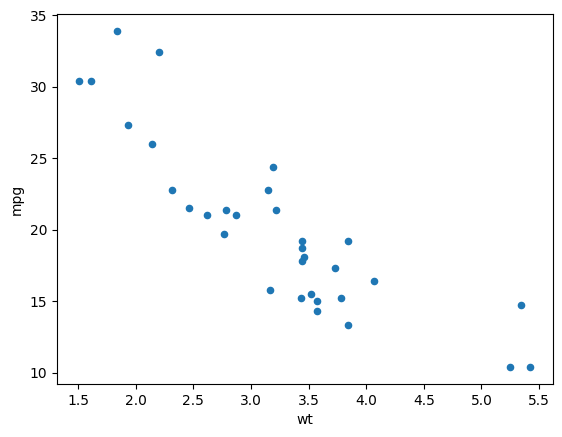

In [6]:
df.plot.scatter(x='wt', y='mpg')

In [35]:
# Tratamento de dados - normalização/ajuste de escala min-max
scaler = MinMaxScaler(feature_range=(0,1))
df['mpg01'], df['wt01'] = scaler.fit_transform(df[['mpg']]), scaler.fit_transform(df[['wt']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='wt', ylabel='mpg'>

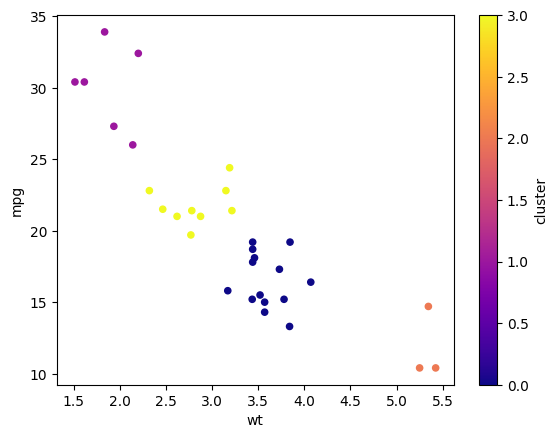

In [36]:
# Execução do K-Means
k = KMeans(n_clusters=4, random_state=1).fit(df[['mpg01', 'wt01']])
df['cluster'] = k.labels_

df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')

# APRENDIZAGEM SUPERVISIONADA
OUTROS ALGORITMOS

In [65]:
# 0. Carga de bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [66]:
dfTit = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv")

# Criação de variável Dummy Gênero
dummy_sex = pd.get_dummies(dfTit["Sex"])
dfTit['SexFemale'] = dummy_sex['female']

# Criação de variável Dummy Pclass
dummy_pclass = pd.get_dummies(dfTit["Pclass"], prefix='Classe')
dfTit['Classe_1'] = dummy_pclass['Classe_1']
dfTit['Classe_2'] = dummy_pclass['Classe_2']

# Preenchimento de nulos para idades
ageMed = dfTit['Age'].mean()
dfTit['AgeNullTrat'] = dfTit['Age'].fillna(ageMed)

# Separação de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(dfTit[['SexFemale','Classe_1','Classe_2', 'AgeNullTrat']], dfTit['Survived'], test_size=0.25, random_state=1)

# Modelo de Árvores de Decisão
#modTit = tree.DecisionTreeClassifier()
# Algoritmo RandomForest
#modTit = RandomForestClassifier(random_state=1,n_estimators=1000)
# Algoritmo SVM (SVC - support vector machines classifier)
modTit = svm.SVC()

modTit.fit(x_treino, y_treino)

# Previsão em teste
y_prev = modTit.predict(x_teste)

# Métricas de avaliação de modelos classificadores (erro de previsão, loss function)
print(accuracy_score(y_teste, y_prev))
print(precision_score(y_teste, y_prev))
print(recall_score(y_teste, y_prev))

0.5650224215246636
0.42857142857142855
0.06315789473684211


In [58]:
print(modTit)

RandomForestClassifier(random_state=1)


# AUTO ML - Automation of Machine Learning

In [68]:
# Instalar biblioteca pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.2 MB/s et

In [3]:
# Importar biblioteca do pycaret
from pycaret.classification import *
import pandas as pd

In [4]:
# Carga de dados
dfTit = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv")

In [5]:
# Configuração do pycaret
s = setup(dfTit, target='Survived')

,Description,Value
0,Session id,962
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 14)"
5,Transformed train set shape,"(623, 14)"
6,Transformed test set shape,"(268, 14)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


In [6]:
# Execução e comparação de modelos
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8138,0.8655,0.6908,0.8073,0.7403,0.5970,0.6051,0.9090
ridge,Ridge Classifier,0.7448,0.0000,0.4196,0.8313,0.5513,0.4031,0.4512,0.1440
et,Extra Trees Classifier,0.7143,0.7958,0.3737,0.7634,0.4903,0.3296,0.3735,0.2890
nb,Naive Bayes,0.6645,0.7930,0.1721,0.7932,0.2739,0.1669,0.2476,0.2480
knn,K Neighbors Classifier,0.6438,0.6246,0.4190,0.5570,0.4704,0.2125,0.2214,0.1650
lda,Linear Discriminant Analysis,0.6276,0.5415,0.0478,0.0733,0.0579,0.0405,0.0424,0.1450
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1950
rf,Random Forest Classifier,0.6164,0.8066,0.0087,0.0500,0.0148,0.0043,0.0070,0.3380
qda,Quadratic Discriminant Analysis,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1460
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [7]:
# Detalhamento do melhor modelo
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=962, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [8]:
# Análise do melhor modelo
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…